### 1d

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
year_to_seconds = 365.*24*3600
t0 = 0
tf = 1*year_to_seconds
period = 1*year_to_seconds # Earth year in seconds
theta0 = 0
a = 1*1.496e13 # 1 AU in cm
e = 0 # circle
m_star = 1*1.988e33 # 1 solar mass in grams 
r0 = a*(1-e) # periastron, aka initial/seeding distance
G = 6.674e-8 # in cgs (previously 1 in solar mass/AU/year units)

def update_theta(specific_L, r, delta_t):
    delta_theta = (specific_L/(r**2)) * delta_t
    return delta_theta

def calc_specific_L(a, e, m_star):
    return np.sqrt(G * m_star * a * (1-e**2))

def calc_r(a, e, theta):
    numerator = a*(1-e**2)
    denominator = 1 + e*np.cos(theta)
    return numerator/denominator

specific_L = calc_specific_L(a, e, m_star)
print(specific_L)

4.455198800502622e+19


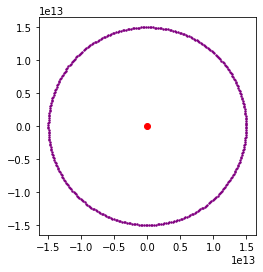

       time             r     theta
0       0.0  1.496000e+13  0.000000
1   86400.0  1.496000e+13  0.017200
2  172800.0  1.496000e+13  0.034399
3  259200.0  1.496000e+13  0.051599
4  345600.0  1.496000e+13  0.068798


In [24]:
rs = []
thetas = []
times = np.linspace(t0, tf, 366) # one iteration per day
delta_t = 1.*year_to_seconds/365
theta = theta0 # initialize theta at theta0
r = r0 # initialize r at r0
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal') # force 1 to 1 aspect ratio to confirm that it's a circle
for times_elt in times:
    rs.append(r)
    thetas.append(theta)
    delta_theta = update_theta(specific_L, r, delta_t)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    #print(theta, x, y)
    plt.scatter(x, y, color='purple', s=2)
    
plt.scatter(0, 0, color='red')
plt.show()

df = pd.DataFrame()
df['time'] = times
df['r'] = rs
df['theta'] = thetas
print(df.head())

### 2d

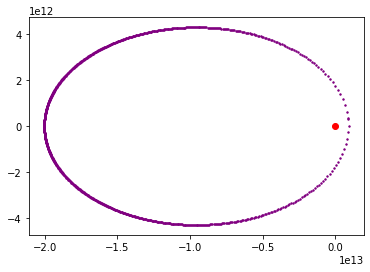

In [242]:
# first just visualizing what my birthday planet looks like 
def calc_period(a, m_star):
    tf = ((4*np.pi**2*a**3)/(G*(m_star)))**0.5 # take m_p as zero, since m_p << m_star
    return tf

rs = []
thetas = []
a = 0.7*1.496e13
e = 363./365 # from my bday
# old bday was so close to the end of the calendar that it needed a super low delta_t to make delta_thetas reasonable
# but we're not asked for this in 2d, so gonna return to e = 363/365 for the temperature part after this
e = 333./365 

specific_L = calc_specific_L(a, e, m_star) # recalculate specific L using new a and e
theta = theta0 # initialize theta at theta0
r0 = a*(1-e) # recalculate new initial distance
r = r0 # and initialize r
tf = calc_period(a, m_star) # recalculate tf
times = np.linspace(t0, tf, 1000) 
delta_t = times[1]-times[0]

#fig = plt.figure()
#ax = fig.add_subplot(111,aspect='equal') # force 1 to 1 aspect ratio to confirm that it's a circle
for times_elt in times:
    rs.append(r)
    thetas.append(theta)
    delta_theta = update_theta(specific_L, r, delta_t)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    #print(theta, x, y)
    plt.scatter(x, y, color='purple', s=2)
plt.scatter(0, 0, color='red')

plt.show()

#df = pd.DataFrame()
#df['time'] = times
#df['r'] = rs
#df['theta'] = thetas
#print(df.head())

In [40]:
#print(delta_t)
#print(np.linspace(t0, tf, 10000)[1], np.linspace(t0, tf, 10000)[0])
#print(np.linspace(t0, tf, 1000)[1], np.linspace(t0, tf, 1000)[0])
#print(np.linspace(t0, tf, 100)[1], np.linspace(t0, tf, 100)[0])

#### Instantaneous temperature

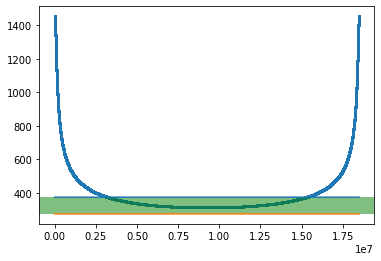

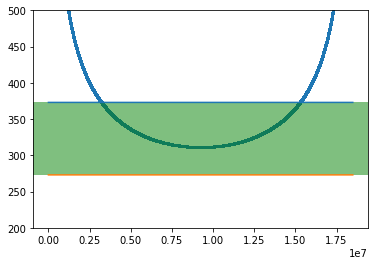

In [251]:
stefan_boltzmann = 5.67e-5 # g s^-3 K^-4
L_star = 3.839e33 # erg/s
a = 0.7*1.496e13
e = 363./365 # from my bday
e = 333./365 # less pathological e
#e = 0.4
A = 0.3
specific_L = calc_specific_L(a, e, m_star) # recalculate specific L using new a and e

def teff(L_star, d, A): # where d is distance from star, ie. r
    return (L_star*(1-A)/(4*np.pi*stefan_boltzmann*d**2))**0.25

# calculate instantaneous Teff at every timestep
temps = []
rs = []
theta = theta0 # initialize theta at theta0
r0 = a*(1-e) # recalculate new initial distance
r = r0 # and initialize r
tf = calc_period(a, m_star) # recalculate tf
#print("period: ", tf)
times = np.linspace(t0, tf, 1000000) 
delta_t = times[1]-times[0]
#print("delta t: ", delta_t)
for times_elt in times:
    delta_theta = update_theta(specific_L, r, delta_t)
    #print(r/1.496e13, delta_theta)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    rs.append(r)
    temp = teff(L_star, r, A)
    temps.append(temp)
    
plt.scatter(times, temps, s=2, label="Teff")
plt.plot(times, np.ones(len(times))*373, label="boiling pt")
plt.plot(times, np.ones(len(times))*273, label="freezing pt")
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.show()

plt.scatter(times, temps, s=2, label="Teff")
plt.plot(times, np.ones(len(times))*373, label="boiling pt")
plt.plot(times, np.ones(len(times))*273, label="freezing pt")
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.ylim(200, 500)
plt.show()

In [252]:
theta 

6.28352004942388

In [253]:
print(max(rs)/1.496e13)
print(min(rs)/1.496e13)
print(max(temps), min(temps))

1.3386301369857012
0.061369863013698615
1454.4119479251112 311.4115466235394


This is quite different from my analytic answers for Temp(min(r)) and Temp(max(r)) in 2c because I'm using non-birthday eccentricity (it does track with analytic answer when I do use the proper eccentricity, though). Even at this more modest eccentricity, the planet dips into the habitable zone near and at apoastron, but very rapidly heats up as it approaches periastron, due to its high-eccentricity orbit. 

### Ignore: this is for sanity checking subsequent plots with better-behaved eccentricities

Previously I needed ~1e6 points to not have pathologically high delta_thetas for old e. In doing so, this leads to a really slow shuffle operation later on for moving average, so we're gonna use a less pathological e to enable smaller number of timesteps --> smaller delta_t's. This leads to a different picture, unfortunately, and we're gonna base the moving average off this one. 

Alternatively, I could've stuck with the high e, but it would've required a really long run (because small delta_t's), or else I end up with significantly greater than 2pi orbits.  

Me from future: jk, going from manual cycling to pandas moving average with a simple hack makes it fast enough to use 1e6 points, so we're sticking with e=363/365

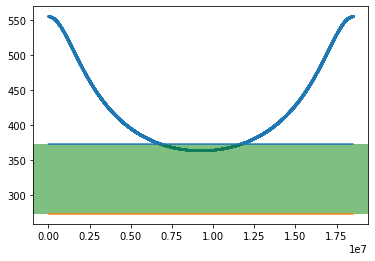

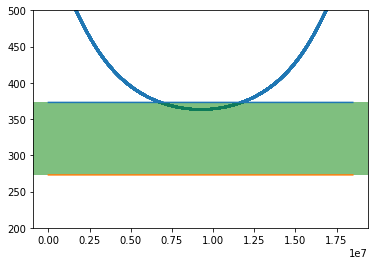

In [221]:
stefan_boltzmann = 5.67e-5 # g s^-3 K^-4
L_star = 3.839e33 # erg/s
a = 0.7*1.496e13
e = 363./365 # from my bday
#e = 333./365 # less pathological e
#e = 33./365 # well-behaved e for sanity check
e = 0.4
A = 0.3
specific_L = calc_specific_L(a, e, m_star) # recalculate specific L using new a and e

def teff(L_star, d, A): # where d is distance from star, ie. r
    return (L_star*(1-A)/(4*np.pi*stefan_boltzmann*d**2))**0.25

# calculate instantaneous Teff at every timestep
temps = []
rs = []
theta = theta0 # initialize theta at theta0
r0 = a*(1-e) # recalculate new initial distance
r = r0 # and initialize r
tf = calc_period(a, m_star) # recalculate tf
#print("period: ", tf)
#times = np.linspace(t0, tf, 1000000) 

times = np.linspace(t0, tf, 10000) 
delta_t = times[1]-times[0]
#print("delta t: ", delta_t)
for times_elt in times:
    delta_theta = update_theta(specific_L, r, delta_t)
    #print(r/1.496e13, delta_theta)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    rs.append(r)
    temp = teff(L_star, r, A)
    temps.append(temp)
    
plt.scatter(times, temps, s=2, label="Teff")
plt.plot(times, np.ones(len(times))*373, label="boiling pt")
plt.plot(times, np.ones(len(times))*273, label="freezing pt")
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.show()

plt.scatter(times, temps, s=2, label="Teff")
plt.plot(times, np.ones(len(times))*373, label="boiling pt")
plt.plot(times, np.ones(len(times))*273, label="freezing pt")
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.ylim(200, 500)
plt.show()

In [222]:
theta

6.284785306622522

### Resume regular programming

#### Now with moving window average to model heat capacity

window size:  350551


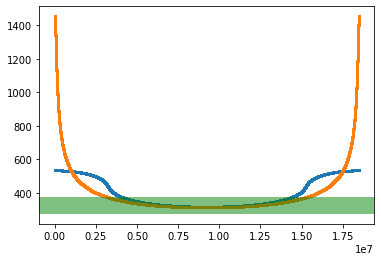

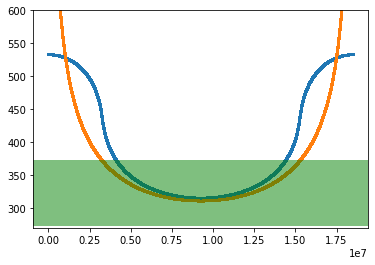

In [254]:
window = 75*24*3600 # choosing 75 days to split the difference of 2-3 months
window_size = int(np.floor(window/delta_t))
print("window size: ", window_size)

df = pd.DataFrame()
df['times'] = times
df['temps'] = temps
df = pd.concat([df, df]) # sneaky simple way to allow moving average window to wrap around df
#print(pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean())
#print(df.rolling(window_size, center=True).mean())
#plt.scatter(times, pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.show()

# zoom in
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.ylim(270, 600)
plt.show()

In [126]:
pd.concat([df.iloc[1:], df.iloc[:1]]).iloc[:window_size] # original way to manually cycle through times

,times,temps
1,3.697104e+02,1454.380853
2,7.394209e+02,1454.341988
3,1.109131e+03,1454.287585
4,1.478842e+03,1454.217653
5,1.848552e+03,1454.132204
...,...,...
14341,5.302017e+06,332.280990
14342,5.302387e+06,332.276487
14343,5.302757e+06,332.271984
14344,5.303126e+06,332.267481


In [ ]:
"""
window = 75*24*3600 # choosing 75 days to split the difference of 2-3 months
window_size = int(np.floor(window/delta_t))
print("window size: ", window_size)
avg_temps = []
for i in range(len(times)):
    #while 
    #index = i-20
    #temp_temps = temps[i:] + temps[:i] # shuffle window across and then back around times
    temp_temps = pd.concat([df.iloc[i:], df.iloc[:i]]).iloc[:window_size] # faster pandas version of the above
    #keep = temp_temps[:window_size]
    avg_temp = np.mean(temp_temps.temps)
    avg_temps.append(avg_temp)
    
plt.scatter(times, avg_temps, s=2)
plt.show()
"""

In [ ]:
#plt.scatter(times, temps, s=2)
#plt.scatter(times, avg_temps[window_size:] + avg_temps[:window_size], s=2)
#plt.show()

#### Now with a land planet

window size:  8763


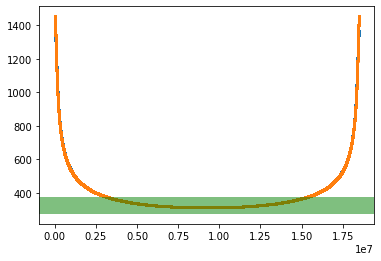

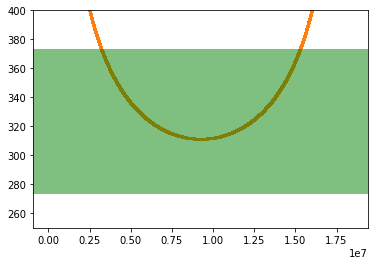

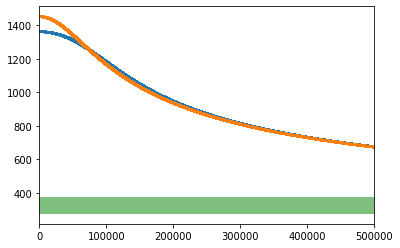

In [255]:
window = 75*24*3600/40 # land planet has 40x smaller heat capacity, per Dressing et al 2010 Table 1
window_size = int(np.floor(window/delta_t))
print("window size: ", window_size)

df = pd.DataFrame()
df['times'] = times
df['temps'] = temps
df = pd.concat([df, df]) # sneaky simple way to allow moving average window to wrap around df
#print(pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean())
#print(df.rolling(window_size, center=True).mean())
#plt.scatter(times, pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.show()

# zoom in
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.ylim(250, 400)
plt.show()

# zoom in
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.xlim(0, 5e5)
plt.show()

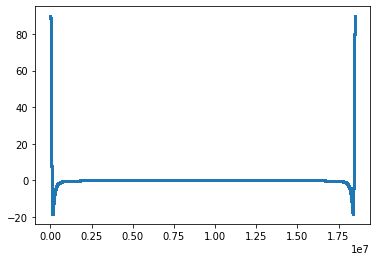

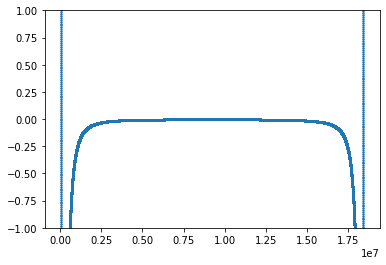

In [256]:
# plot the difference
plt.scatter(df.times, df.temps - df.rolling(window_size, center=True).mean().temps, s=2)
plt.show()

plt.scatter(df.times, df.temps - df.rolling(window_size, center=True).mean().temps, s=2)
plt.ylim(-1, 1)
plt.show()

Looks like cutting the window down to 75/40, or 1.875, days (out of a period of 0.7 AU), is enough to make it a negligibly impactful averaging kernel for most of a highly eccentric planet's orbit. The major exception is near periastron, when the steep change in temperature leads to a decently-sized difference (and a significant difference when using my actual birthday, of ~1000 K) between windowed average and instantaneous value. Perhaps with finer delta_t's, we might be able to catch the planet at more positions closer to periastron and get a more nuanced temperature curve, but such is the life of a highly-eccentric planet.

#### What would it take to stay entirely within HZ?

In [259]:
np.mean(temps)

400.5012060780974

Well...it doesn't look like even with window size equal to the entire period of the planet (ie. just averaging the whole time series) at my more modest eccentricity of 333/365, I'd get a habitable zone Teff. 

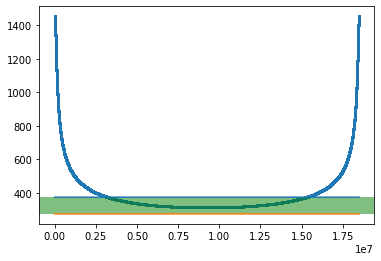

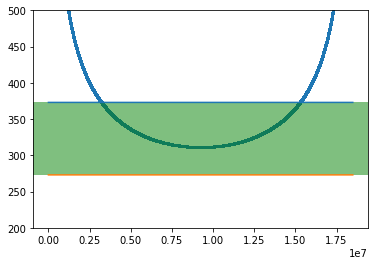

In [272]:
stefan_boltzmann = 5.67e-5 # g s^-3 K^-4
L_star = 3.839e33 # erg/s
a = 0.7*1.496e13
e = 363./365 # from my bday
e = 333./365 # less pathological e
#e = 0.4 # even less pathological e
A = 0.3
specific_L = calc_specific_L(a, e, m_star) # recalculate specific L using new a and e

def teff(L_star, d, A): # where d is distance from star, ie. r
    return (L_star*(1-A)/(4*np.pi*stefan_boltzmann*d**2))**0.25

# calculate instantaneous Teff at every timestep
temps = []
rs = []
theta = theta0 # initialize theta at theta0
r0 = a*(1-e) # recalculate new initial distance
r = r0 # and initialize r
tf = calc_period(a, m_star) # recalculate tf
#print("period: ", tf)
times = np.linspace(t0, tf, 1000000) 
delta_t = times[1]-times[0]
#print("delta t: ", delta_t)
for times_elt in times:
    delta_theta = update_theta(specific_L, r, delta_t)
    #print(r/1.496e13, delta_theta)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    rs.append(r)
    temp = teff(L_star, r, A)
    temps.append(temp)
    
plt.scatter(times, temps, s=2, label="Teff")
plt.plot(times, np.ones(len(times))*373, label="boiling pt")
plt.plot(times, np.ones(len(times))*273, label="freezing pt")
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.show()

plt.scatter(times, temps, s=2, label="Teff")
plt.plot(times, np.ones(len(times))*373, label="boiling pt")
plt.plot(times, np.ones(len(times))*273, label="freezing pt")
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.ylim(200, 500)
plt.show()

In [269]:
theta

6.283194926315768

In [270]:
np.mean(temps)

429.55478411386906

In [280]:
window = 75*24*3600
window = 0.9*tf
window_size = int(np.floor(window/delta_t))
print(window/tf)
print(window_size/len(times))

0.9
0.899999


window size:  349999
number of timesteps:  1000000


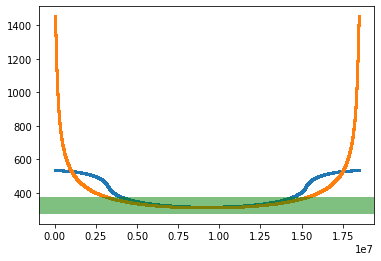

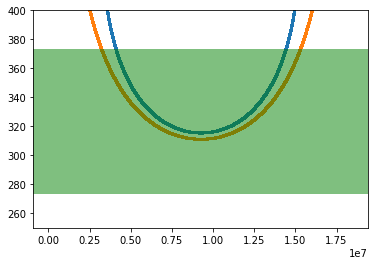

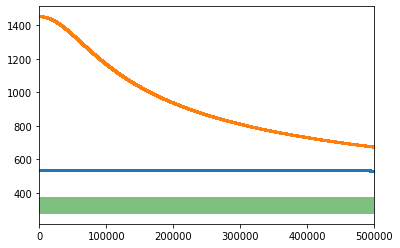

In [289]:
window = 75*24*3600
window = 0.35*tf
window_size = int(np.floor(window/delta_t))
print("window size: ", window_size)
print("number of timesteps: ", len(times))

df = pd.DataFrame()
df['times'] = times
df['temps'] = temps
df = pd.concat([df, df]) # sneaky simple way to allow moving average window to wrap around df
#print(pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean())
#print(df.rolling(window_size, center=True).mean())
#plt.scatter(times, pd.concat([df.iloc[window_size:], df.iloc[:window_size]]).rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.show()

# zoom in
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.ylim(250, 400)
plt.show()


# zoom in
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temps, s=2)
plt.scatter(df.times, df.temps, s=2)
plt.axhspan(273, 373, facecolor='g', alpha=0.5)
plt.xlim(0, 5e5)
plt.show()

### 3b

Plot the isolation mass for a growing planet (in units of Earth masses) as a function of distance from the Sun (in units of AU, from 0 to 10 AU).

16622222222222.223 1.2563855790439834e-28 4.592691270233197e+39
33244444444444.445 2.6412253239863703e-29 3.6741530161865575e+40
49866666666666.67 1.0607184421062869e-29 1.2400266429629633e+41
66488888888888.89 5.552492267043673e-30 2.939322412949246e+41
83111111111111.11 2.6886261609531267e-29 5.740864087791495e+41
99733333333333.34 1.7839086711213625e-29 9.920213143703707e+41
116355555555555.56 1.261079133934784e-29 1.5752931056899864e+42
132977777777777.78 9.338141686161993e-30 2.3514579303593968e+42
149600000000000.0 7.164193108809952e-30 3.348071936e+42


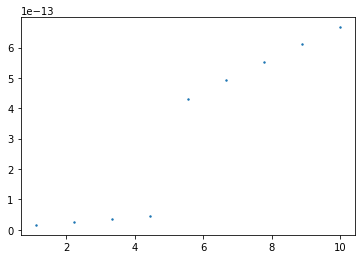

In [321]:
def sigma_p(r):
    sigma0 = 1.7e3 # g cm^-2
    try:
        if (r < 5*1.496e13) & (r > 0): # < 5 AU, the current frostline (Jewitt et al 2007 [but really Wikipedia])
            return 0.01*sigma0*r**-1.5
        elif r >= 5*1.496e13:
            return 0.04*sigma0*r**-1.5

    except ValueError:
        print(r, "invalid r")

def calc_miso(r, m_star):
    #print(sigma_p(r))
    m_isos = []
    for r_elt in r:
        print(r_elt, (sigma_p(r_elt))**1.5, r_elt**3)
        m_isos.append(166 * ((m_star/1.988e33)**0.5) * ((sigma_p(r_elt))**1.5) * r_elt**3)
    return m_isos

distances = 1.496e13*np.linspace(0, 10, 10)[1:] # avoid dividing by zero
m_isos = calc_miso(distances, m_star)
#print(m_isos)
m_isos = [m_isos_elt/5.972e27 for m_isos_elt in m_isos] # convert to Earth masses
distances = np.linspace(0, 10, 10)[1:] # back to AU for plotting
plt.scatter(distances, m_isos, s=2)
plt.show()

### 3c

257.16963867289195
152.913982036241
112.8180927925918
90.92319771044805
76.91166115132214
67.08203932499369
59.75801523508778
54.06325681803197
49.49232003839766


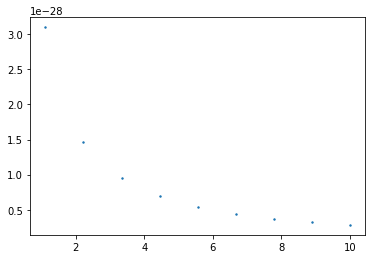

In [325]:
def calc_t_disk(r):
    t4 = 6e9 * (r/1.496e13)**-3 
    return t4**0.25

def calc_m_env(rho_m, t_disk, r):
    term1 = rho_m**-0.5
    term2 = t_disk**1.5
    term3 = (np.log(2*rho_m*r/sigma_p(r)))**1.5
    
    return 1.6e-6*term1*term2*term3

rho_earth = 5.5 # proxy for rocky planet within snow line
rho_pluto = 1.9 # proxy for icy body beyond snow line

m_envs = []
distances = 1.496e13*np.linspace(0, 10, 10)[1:] # avoid dividing by zero
for r_elt in distances:
    print(calc_t_disk(r_elt))
    if (r < 5*1.496e13) & (r > 0): 
        m_env = calc_m_env(rho_earth, calc_t_disk(r_elt), r_elt)
        m_envs.append(m_env)
        
    elif r >= 5*1.496e13: # icy body density beyond snow line
        m_env = calc_m_env(rho_pluto, calc_t_disk(r_elt), r_elt)
        m_envs.append(m_env)
        
m_envs = [m_envs_elt/5.972e27 for m_envs_elt in m_envs] # convert to Earth masses
distances = np.linspace(0, 10, 10)[1:] # back to AU for plotting
plt.scatter(distances, m_envs, s=2)
plt.show()

### 3d

The planets that formed closer to the Sun have higher M_envs but lower M_isos. That is, their threshold for accreting a significant atmosphere is higher, while the mass at which their mass accretion drastically slows down is lower (and so their terminal mass is also lower), which is the opposite of what's needed to acquire substantial gas envelopes. 